In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft2, fftfreq, fftshift
from glob import glob
!{sys.executable} -m pip install tqdm
from tqdm import tqdm
import datetime
from time import perf_counter
from scipy.sparse.linalg import svds
from dasquakes import *

/bin/bash: {sys.executable}: command not found


In [2]:

#def get_fft(filename):
 #   data_file=h5py.File(filename)
  #  data=data_file['/Acquisition/Raw[0]/RawData']
   # downsample=10 #q=20
    #subseadata=data[::downsample,2450:3200]
   # subseadata=data[:,2450:3200]
    #ft=fftshift(fft2(subseadata))
    #f=fftshift(fftfreq(subseadata.shape[0],d=0.01*downsample))
    #k=fftshift(fftfreq(subseadata.shape[1],d=3.17))
    #return ft, f, k

In [3]:
#glob.glob('/data/data6/whidbey/whidbey_2022-11-17_00-*-39_UTC.h5')
#glob.glob('/data/data6/whidbey/whidbey_2022-11-17_00-00-39_UTC.h5')

['/data/data6/whidbey/whidbey_2022-11-17_00-00-39_UTC.h5']

In [4]:
#filename='/data/data6/whidbey/whidbey_2022-11-17_00-00-39_UTC.h5'
#ft,f,k=get_fft(filename)

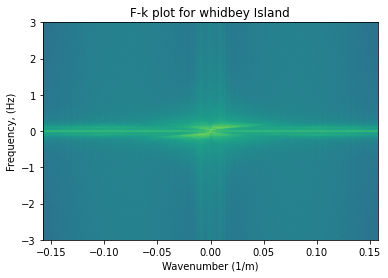

In [5]:
plt.imshow(np.log10(np.abs(ft)), extent=[k[0],k[-1],f[0],f[-1]], aspect='auto')
plt.title('F-k plot for whidbey Island')
plt.ylabel('Frequency, (Hz)')
plt.xlabel('Wavenumber (1/m)')
plt.ylim(-3,3)
plt.show()

In [6]:
filename='/data/data6/whidbey/whidbey_2022-11-17_00-00-39_UTC.h5'
ft,f,k=get_fft(filename)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


Text(0, 0.5, 'Frequency (Hz)')

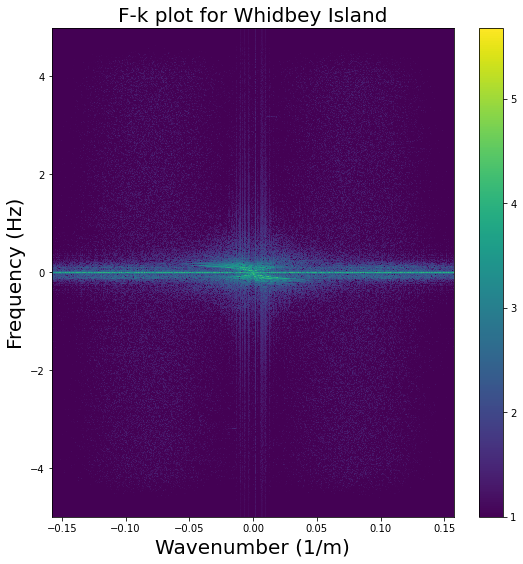

In [7]:
plt.subplots(figsize=(9,9))
c=plt.pcolormesh(k,f,np.log10(np.abs(ft)),vmin=1)
plt.colorbar(c)
plt.title('F-k plot for Whidbey Island', fontsize=20)
plt.xlabel('Wavenumber (1/m)', fontsize=20)
plt.ylabel('Frequency (Hz)', fontsize=20)

In [8]:
ft.shape

(6000, 750)

In [9]:
ft.flatten().shape

(4500000,)

In [10]:
#hacer lo mismo pero para un ft.flatten
#ftt=ft.flatten()
absft=np.abs(ft)
print(absft)

[[1.68606705 0.79894375 0.21298961 ... 0.45047031 0.21298961 0.79894375]
 [1.60609324 0.87444577 0.30340992 ... 0.34841524 0.21680381 0.82871876]
 [1.75630255 0.91566877 0.16750549 ... 0.34830284 0.23711617 0.91040653]
 ...
 [1.73434321 0.86704658 0.34548977 ... 0.37600274 0.29291325 0.9168173 ]
 [1.75630255 0.91040653 0.23711617 ... 0.32718323 0.16750549 0.91566877]
 [1.60609324 0.82871876 0.21680381 ... 0.30359847 0.30340992 0.87444577]]


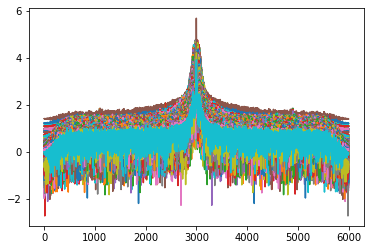

In [11]:
plt.plot(np.log10(absft))

In [12]:
absft.shape

(6000, 750)

Text(0.5, 1.0, 'F-k plot for whidbey Island')

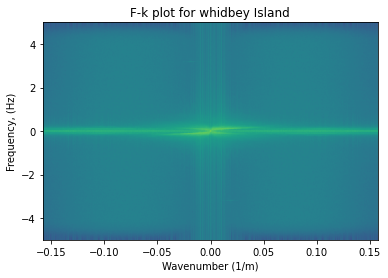

In [13]:

plt.imshow(np.log10(absft), extent=[k[0],k[-1],f[0],f[-1]], aspect='auto')
#plt.imshow(np.log10(np.abs(ft)), extent=[k[0],k[-1],f[0],f[-1]], aspect='auto')
plt.ylabel('Frequency, (Hz)')
plt.xlabel('Wavenumber (1/m)')
plt.title('F-k plot for whidbey Island')


In [14]:


#definition of variables

#q = 50         # decimation factor
#N = 1500     # number of samples to analyze
#dt = 60          # number of minutes between samples
#nt = int(6000/q) # Number of time steps in each sample
#nx = 375         # Number of subsea channels at Whidbey
#D = np.zeros((nx*nt,N))
#t = []
#start_time=datetime.datetime(2022, 7, 15, 0, 0, 0)

In [15]:
#loop to read many files and calculate fk
#the variable this column is saving each ft
#i is the contador of the loop
#for i in tqdm(range(N)):
 #       this_time = start_time + i*datetime.timedelta(minutes=dt)
  #      t.append(this_time)
   #     ft,f,k = fk_analysis(this_time,draw_figure=False,downsamplefactor=q,
    #                        record_length = 1)
   #     if len(ft) == 1:
    #        continue

      #  shape = ft.shape
       # save_nt = shape[0]
        #save_nx = shape[1]

        #if  save_nt< nt:
         #   allft = np.zeros((nt,nx))
          #  allft[0:save_nt,0:nx] = np.abs(ft)
          #  this_column =  allft.flatten()
      #  elif save_nt > nt:
       #      allft= np.zeros((nt,nx))
        #     allft[0:nt,0:nx] = np.abs(ft[0:nt,0:nx])
         #    this_column =   allft.flatten()
        #else:
         #   this_column = np.abs( ft.flatten() )
        #D[:,i] = this_column
       
            

In [16]:
 #converting the time in a numpy array
#t=np.array(t)


In [17]:
#D.shape


In [18]:
#fig=plt.figure(figsize=(10,5))
#ax1 = fig.add_subplot(111)
#ax1.matshow(D)
#matplot 
#ax1.grid()

#CALCULATING SVD TO THIS D (JUST 250 )

In [19]:
#SINGULAR DESCOMPOSICION VALUES
#ns = N
#nPoints=ns
#Davg = np.mean(D,axis=1)                  # Compute mean
#B = D - np.tile(Davg,(nPoints,1)).T       # Mean-subtracted data
#print(B.shape)

In [20]:

#MAKING D a square matrix
#U,S,V = svds( D[:,0:ns] )
#S.shape

In [41]:
#import numpy.linalg as ln
import sys
!{sys.executable} -m pip install sklearn


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [22]:
import sklearn 
from sklearn.decomposition import PCA

In [61]:
from sklearn.decomposition import PCA # this is the SKLEAN model
#pca=PCA(n_components=3).fit(D.transpose())
pca=PCA(n_components=10).fit(absft)# retain all 3 components
#pca=PCA().fit(D.transpose())# retain all 3 components
print(pca)

PCA(n_components=10)


In [57]:
print(pca.components_)

[[0.03505385 0.01047232 0.02973678 0.00929668 0.01231654 0.01185398
  0.01552253 0.01139964 0.01410733 0.01400372 0.02118889 0.01018985
  0.01515512 0.01616295 0.01733087 0.01572343 0.01934445 0.00948532
  0.01167424 0.01057114 0.01570315 0.01075904 0.01067174 0.01228858
  0.01377507 0.01567065 0.01834584 0.01998489 0.01229689 0.01352168
  0.02189228 0.01408966 0.01114972 0.02167801 0.01148983 0.01374615
  0.01833959 0.01239952 0.01272945 0.01759002 0.01358753 0.01358129
  0.01567734 0.01034112 0.01052413 0.03342372 0.01841907 0.01072399
  0.01679433 0.01706113 0.01599183 0.01922893 0.01669661 0.01272541
  0.01235374 0.02093329 0.01113827 0.02034217 0.01225895 0.01932632
  0.01109529 0.01932748 0.01779879 0.01426141 0.01438768 0.0102687
  0.00989237 0.01326732 0.01387958 0.01552624 0.01617521 0.02095617
  0.00985668 0.01765925 0.01402672 0.01553478 0.01546058 0.02133146
  0.01133798 0.01314357 0.01467226 0.02198871 0.01643585 0.01172522
  0.01935014 0.01941257 0.01433621 0.0225585  0.0

In [62]:
len(pca.components_)

10

In [63]:
print(pca.explained_variance_ratio_)

[0.66486164 0.12317807 0.03392387 0.0330681  0.02096511 0.01498062
 0.01082282 0.00910668 0.00650736 0.00591624]


In [64]:
# The 3 PCs' explained variance
print(pca.explained_variance_)

[1.14893361e+08 2.12861477e+07 5.86231326e+06 5.71443046e+06
 3.62293766e+06 2.58876979e+06 1.87026838e+06 1.57370570e+06
 1.12452280e+06 1.02237308e+06]


In [28]:

#import math
#azimuth=math.degrees(math.atan2(pca.components_[0][0],pca.components_[0][1]))
#if azimuth <0:azimuth+=360
#print("direction of the plate ",azimuth," degrees from North")

In [29]:
#print(pca.explained_variance_ratio_)
#fig,ax=plt.subplots(2,1,figsize=(11,8))
#ax[0].plot(pca.explained_variance_ratio_);ax[0].set_xticks(range(0,3))
#ax[0].set_xlabel('Number of dimensions')
#ax[0].set_ylabel('Explained variance ')
#ax[0].set_title('Variance explained with each PC')
#ax[1].plot(np.cumsum(pca.explained_variance_ratio_))
#ax[1].set_xlabel('Number of dimensions')
#ax[1].set_ylabel('Explained variance ')
#ax[1].set_title('Variance explained with cumulated PCs')

In [65]:
d = np.argmax(np.cumsum(pca.explained_variance_ratio_)>=0.95) +1
print("minimum dimension size to explain 95% of the variance ",d)

minimum dimension size to explain 95% of the variance  1


In [66]:
pca = PCA(n_components=d).fit(absft)
D_pca = pca.transform(absft)
#print("original shape:   ", D.shape)
#print(pca)
#plt.scatter(D[0,:],D[1,:])
#print("transformed shape:", D_pca.shape)

(6000, 750)


(-0.25, 0.25)

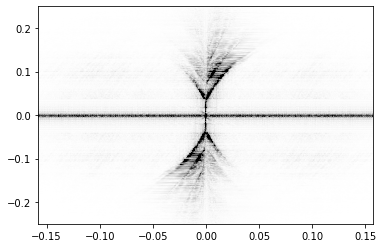

In [67]:
D_new = pca.inverse_transform(D_pca)
print(D_new.shape)
#plt.imshow(np.log10(absft), extent=[k[0],k[-1],f[0],f[-1]], aspect='auto')
plt.imshow(np.abs(ft),aspect='auto',vmin=0,vmax=10000,extent=[k[0],k[-1],f[0],f[-1]],cmap='gray_r')
plt.ylim(-0.25,0.25)

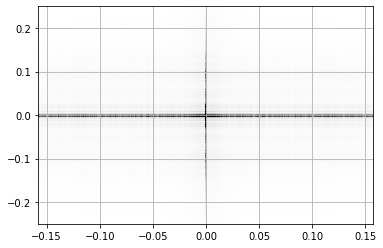

In [68]:
#plt.imshow(np.log10(D_new), extent=[k[0],k[-1],f[0],f[-1]], aspect='auto')
plt.imshow(np.abs(D_new),aspect='auto',vmin=0,vmax=10000,extent=[k[0],k[-1],f[0],f[-1]],cmap='gray_r')
plt.grid(True)
plt.ylim(-0.25,0.25)
plt.show()